# 영화 추천 시스템

1. Demographic Filtering (인구통계학적 필터링)
2. Content Based Filtering (컨텐츠 기반 필터링)
3. Collaborative Filtering (협업 필터링)

## 1. Demographic Filtering (인구통계학적 필터링)

In [1]:
import pandas as pd
import numpy as np

df_1 = pd.read_csv('tmdb_5000_credits.csv')
df_2 = pd.read_csv('tmdb_5000_movies.csv')

In [2]:
df_1.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [3]:
df_2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [4]:
df_1.shape, df_2.shape

((4803, 4), (4803, 20))

In [5]:
df_1['title'].equals(df_2['title'])

True

In [6]:
df_1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
df_1.columns = ['id', 'title', 'cast', 'crew']

In [8]:
df_1.head(3)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [9]:
df_1 = df_1[['id', 'cast', 'crew']] # 컬럼 정리
df_1.head(3)

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [10]:
df_2 = df_2.merge(df_1, on='id') # 파일 합침
df_2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [11]:
# 영화 1 : 영화 평점이 10/10 -> 5명 평가
# 영화 2 : 영화 평점이 8/10 -> 500명 평가 
# 영화 2가 더 신뢰도가 높음

In [12]:
C = df_2['vote_average'].mean()
C # 전체 영화 평균 평점

6.092171559442011

In [13]:
m = df_2['vote_count'].quantile(0.9) # 모집단에서 10등분으로 나눈 것 중에 상위 1등분
m # 1838 이상의 투표수를 받은 영화만 산정

1838.4000000000015

In [14]:
q_movies = df_2.copy().loc[df_2['vote_count'] >= m] # m이상의 투표수를 받은 영화만 분류
q_movies.shape

(481, 22)

In [15]:
q_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [16]:
def weighted_rating (x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [17]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1) # 컬럼이 아닌 로우 기준으로
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [18]:
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

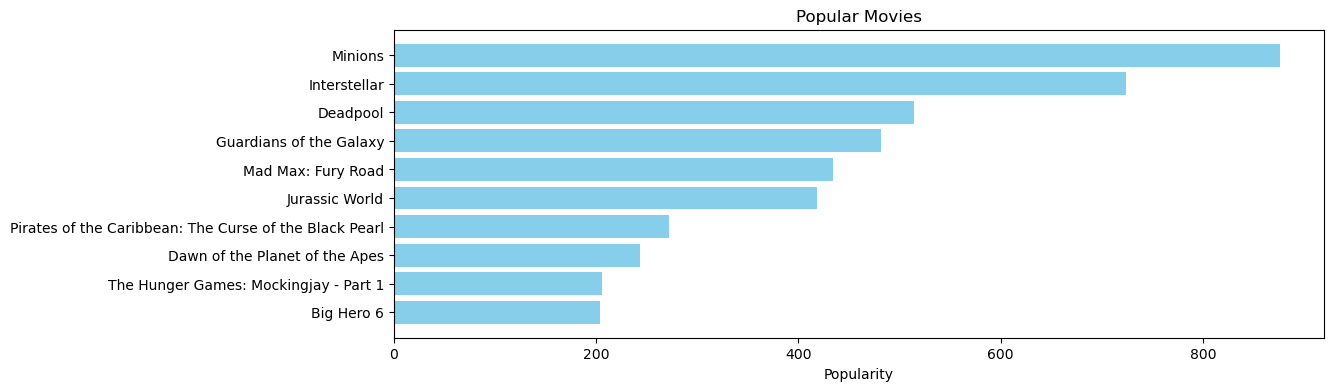

In [19]:
pop= df_2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## 2. Content Based Filtering (컨텐츠 기반 필터링)

## 줄거리 기반 추천

In [20]:
df_2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Bag Of Words - BOW

문장1 : I am a boy

문장2 : I am a girl

I(2), am(2), a(2), boy(1), girl(1)

        
        
        I    am   a   boy    girl
 문장1  1    1    1    1      0   (1,1,1,1,0)
 (I am a boy)
 
 문장2  1    1    1    0      1   (1,1,1,0,1)
 (I am a girl)
 
 피처 벡터화.
 
 
 문서 100개
 모든 문서에서 나온 단어 10,000 개
 100 * 10,000 = 100만
 
        단어1, 단어2, 단어3, 단어4, .... 단어 10000
문서1    1       1       3    0    
문서2
문서3
..
문서100

1. TfidfVectorizer (TF-IDF 기반의 벡터화) : a, the 같은 필요 없는 단어 색출
2. CountVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # 객체 생성

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [23]:
df_2['overview'].isnull().values.any() # overview컬럼 중 빈칸인 로우가 하나라도 있는지

True

In [24]:
df_2['overview'] = df_2['overview'].fillna('') #빈칸인 로우를 ''로 채우기

In [25]:
tfidf_matrix = tfidf.fit_transform(df_2['overview'])
tfidf_matrix.shape # 로우는 각 영화에 대한 overview index 컬럼은 overview 내용을 조각조각 낸 element 

(4803, 20978)

In [26]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

| | 문장1 | 문장2 | 문장3 |
|---|---|---|---|
|문장1|1|0.3|0.8|
|문장2|0.3|1|0.5|
|문장3|0.8|0.5|1|

In [28]:
cosine_sim.shape # overview가 로우 및 컬럼이 되며 코사인 시뮬러리티는 0~1사이로 표시

(4803, 4803)

In [29]:
indices = pd.Series(df_2.index, index=df_2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [30]:
indices['The Dark Knight Rises']

3

In [31]:
df_2.iloc[[3]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [32]:
# 영화의 제목을 입력받으면 코사인 유사도를 통해서 가장 유사도가 높은 상위 10개의 영화 목록 반환
def get_recommendations(title, cosine_sim=cosine_sim):
    # 영화 제목을 통해 전체 데이터 기준 그 영화의 index 값을 얻기
    idx = indices[title]
    
    # 코사인 유사도 매트릭스 (cosine_sim) 에서 idx (영화의 인덱스)에 해당하는 데이터를 (idx, 유사도) 형태로 얻기
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 코사인 유사도 기준으로 내림차순 정렬
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱
    sim_scores = sim_scores[1:11]
    
    # 추천 영화 목록 10개의 인덱스 정보 추출
    movie_indices = [i[0] for i in sim_scores]
    
    # 인덱스 정보를 통해 영화 제목 추출
    return df_2['title'].iloc[movie_indices]

In [33]:
test_idx = indices['The Dark Knight Rises'] # 영화 제목을 통해 전체 데이터 기준 그 영화의 index 값을 얻기
test_idx

3

In [34]:
cosine_sim[3] # 영화의 인덱스

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [35]:
test_sim_scores = list(enumerate(cosine_sim[3])) # 코사인 유사도 매트릭스 (cosine_sim) 에서 idx (영화의 인덱스)에 해당하는 데이터를 (idx, 유사도) 형태로 얻기
list(enumerate(cosine_sim[3]))
# 3번째 인덱스 문장에 관한 코사인 시뮬러리티
# (3,3)에 있는 값은 보다시피 유사도가 1임

[(0, 0.0249951158376727),
 (1, 0.0),
 (2, 0.0),
 (3, 1.0),
 (4, 0.010433403719159354),
 (5, 0.0051446018158107934),
 (6, 0.01260063243546246),
 (7, 0.026954270578912674),
 (8, 0.02065221688538951),
 (9, 0.1337400906655523),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.004071333922512107),
 (16, 0.021121093874993183),
 (17, 0.0),
 (18, 0.006768893195007471),
 (19, 0.010765175685064708),
 (20, 0.007178266390761152),
 (21, 0.033380775071488206),
 (22, 0.0),
 (23, 0.0),
 (24, 0.019238168304196293),
 (25, 0.017013388161368177),
 (26, 0.018845673291717265),
 (27, 0.0),
 (28, 0.008351231142809445),
 (29, 0.02582248131068942),
 (30, 0.017549884233472455),
 (31, 0.029947529512076927),
 (32, 0.021708602796233892),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.028418448812136628),
 (37, 0.0),
 (38, 0.030631547964966054),
 (39, 0.01088522587631032),
 (40, 0.0),
 (41, 0.021109848007927),
 (42, 0.008087287409335878),
 (43, 0.0),
 (44, 0.0),
 (45, 0.008667206203132952),
 (46, 0.0

In [36]:
# sort메소드의 경우 원본에 영향 X, sorted메소드의 경우 원본 영향 O
test_sim_scores = sorted(test_sim_scores, key=lambda x: x[1], reverse=True) # 코사인 유사도 기준으로 내림차순 정렬
test_sim_scores[1:11] # 자기 자신을 제외한 10개의 추천 영화를 슬라이싱

[(65, 0.30151176591665485),
 (299, 0.29857045255396825),
 (428, 0.2878505467001694),
 (1359, 0.264460923827995),
 (3854, 0.18545003006561456),
 (119, 0.16799626199850706),
 (2507, 0.16682891043358278),
 (9, 0.1337400906655523),
 (1181, 0.13219702138476813),
 (210, 0.13045537014449818)]

In [37]:
def get_second(x):
    return x[1]

lst = ['인덱스', '유사도']
print(get_second(lst))

유사도


In [38]:
(lambda x : x[1])(lst)

'유사도'

In [39]:
# 추천 영화 목록 10개의 인덱스 정보 추출
test_movie_indices = [i[0] for i in test_sim_scores[1:11]]
test_movie_indices

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

In [40]:
# 인덱스 정보를 통해 영화 제목 추출
df_2['title'].iloc[test_movie_indices]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [41]:
df_2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [42]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

정리하자면, 
1) 오버뷰 데이터를 가져온 후, 의미단위로 자른다음, 의미 없는 텍스트 커팅
2) 벡터활용하여 로우가 각 영화의 오버뷰 컬럼이 모든 영화의 오버뷰 엘리먼트인 행렬1로 변환
3) 그런 다음 0과 1을 사용하여 해당된 엘리먼트에는 1 아닌 엘리먼트에는 0을 붙임
4) 이 행렬1을 활용하여 코사인 시뮬러리티 계산 가능
5) 로우가 각 영화의 오버뷰, 컬럼도 각 영화의 오버뷰이고 시뮬러리티를 계산한 행렬2를 만듦
-> 여기까지가 코사인 시뮬러리티 계산 과정
그 후에는 인덱스 숫자 활용하여 추천영화를 가져오는 함수를 만들어주는 것

## 다양한 요소 기반 추천 (장르, 감독, 키워드 등)

In [43]:
df_2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [44]:
df_2.loc[0,'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [45]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

In [46]:
type(s1), type(s2)

(list, str)

In [47]:
from ast import literal_eval
s2 = literal_eval(s2)
s2, type(s2)

([{'id': 28, 'name': 'Action'}], list)

In [48]:
print(s1)
print(s2)

[{'id': 28, 'name': 'Action'}]
[{'id': 28, 'name': 'Action'}]


In [49]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features: 
    df_2[feature] = df_2[feature].apply(literal_eval)

In [50]:
df_2.loc[0,'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [51]:
# 감독 정보 추출
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [52]:
df_2['director'] = df_2['crew'].apply(get_director)
df_2['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [53]:
df_2[df_2['director'].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
3661,0,"[{'id': 18, 'name': 'Drama'}]",NaN,19615,[],en,Flying By,A real estate developer goes to his 25th high ...,1.546169,[],...,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's about the music,Flying By,7.0,2,"[{'cast_id': 1, 'character': 'George', 'credit...",[],NaN
3670,0,"[{'id': 10751, 'name': 'Family'}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,88.0,[],Released,NaN,Running Forever,0.0,0,[],[],NaN
3729,3250000,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.paathefilm.com/,26379,[],en,Paa,He suffers from a progeria like syndrome. Ment...,2.126139,"[{""name"": ""A B Corp"", ""id"": 4502}]",...,133.0,"[{""iso_639_1"": ""hi"", ""name"": ""\u0939\u093f\u09...",Released,NaN,Paa,6.6,19,"[{'cast_id': 1, 'character': 'Auro', 'credit_i...","[{'credit_id': '52fe44fec3a368484e042a29', 'de...",NaN
3977,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,55831,"[{'id': 10183, 'name': 'independent film'}]",en,Boynton Beach Club,A handful of men and women of a certain age pi...,0.188870,[],...,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Boynton Beach Club,6.8,3,"[{'cast_id': 1, 'character': 'Marilyn', 'credi...",[],NaN
4068,0,[],NaN,371085,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],...,0.0,[],Released,NaN,Sharkskin,0.0,0,[],[],NaN
4105,2000000,[],NaN,48382,[],en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.031947,[],...,120.0,[],Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",5.0,2,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",[],NaN
4118,0,[],NaN,325140,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],...,0.0,[],Released,NaN,Hum To Mohabbat Karega,0.0,0,[],[],NaN
4123,7000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://www.roadsideromeo.com/,20653,[],en,Roadside Romeo,This is the story of Romeo. A dude who was liv...,0.253595,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Roadside Romeo,6.7,3,"[{'cast_id': 1, 'character': 'Romeo', 'credit_...",[],NaN
4247,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[],NaN
4305,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,114065,[],en,Down & Out With The Dolls,"The raunchy, spunky tale of the rise and fall ...",0.002386,[],...,88.0,[],Released,Ain't Rock 'N' Roll a bitch.,Down & Out With The Dolls,0.0,0,[],[],NaN


In [54]:
df_2.loc[0,'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [55]:
df_2.loc[0,'genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [56]:
df_2.loc[0, 'keywords']

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [57]:
# 처음 3개의 데이터 중에서 name에 해당하는 value만 추출
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3 :
            names = names[:3]
        return names
    return []

In [58]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df_2[feature] = df_2[feature].apply(get_list)

In [59]:
df_2[['title', 'cast', 'director', 'keywords', 'genres']]

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...,...,...
4798,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4799,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",Edward Burns,[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",Scott Smith,"[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4801,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]",Daniel Hsia,[],[]


In [60]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ',''))
        else:
            return ''

In [61]:
features = ['cast', 'director','keywords', 'genres']
for feature in features:
    df_2[feature] = df_2[feature].apply(clean_data)

In [62]:
df_2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [63]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['director']) + ' ' + ' '.join(x['genres'])
df_2['soup'] = df_2.apply(create_soup, axis=1)
df_2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein e d w a...
4800    date loveatfirstsight narration ericmabius kri...
4801     danielhenney elizacoupe billpaxton d a n i e ...
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

In [64]:
df_2['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_2['soup'])
count_matrix

<4803x9290 sparse matrix of type '<class 'numpy.int64'>'
	with 38149 stored elements in Compressed Sparse Row format>

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
cosine_sim2

array([[1.        , 0.33333333, 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.22222222, 0.22222222, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [67]:
df_2 = df_2.reset_index()
indices = pd.Series(df_2.index, index=df_2['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [68]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3073           Romeo Is Bleeding
1986                      Faster
3326              Black November
1503                      Takers
303                     Catwoman
747               Gangster Squad
1149             American Hustle
Name: title, dtype: object

In [69]:
get_recommendations('Up', cosine_sim2)

1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
3114                                          Elsa & Fred
1580                                          The Nut Job
4709                            A Charlie Brown Christmas
40                                                 Cars 2
42                                            Toy Story 3
118                                           Ratatouille
173                                        Happy Feet Two
178                                                 Rango
Name: title, dtype: object

In [70]:
get_recommendations('The Martian', cosine_sim2)

4                    John Carter
95                  Interstellar
365                      Contact
256                    Allegiant
1326                The 5th Wave
1958                 On the Road
3043            End of the Spear
3373    The Other Side of Heaven
3392                       Gerry
3698                   Moby Dick
Name: title, dtype: object

In [71]:
get_recommendations('The Avengers', cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

In [72]:
import pickle

In [73]:
df_2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...


In [74]:
movies = df_2[['id', 'title']].copy()
movies.head(5)

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [77]:
pickle.dump(movies, open('movies.pickle', 'wb'))

In [78]:
pickle.dump(cosine_sim2, open('cosine_sim.pickle', 'wb'))